### Importing the Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

### Taking the Data from the url

In [5]:
url = "https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

polls = requests.get(url).text
data = StringIO(polls)

In [6]:
polldata = pd.read_csv(data)

In [7]:
polldata.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


### Dataset Information 

In [8]:
polldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.3+ KB


### Answering the necessary questions ahead

### 1.) Who was being polled and what was their party affiliation?

In [9]:
polldata.Affiliation.value_counts()

None     1434
Dem        59
Rep        21
Other       8
Name: Affiliation, dtype: int64

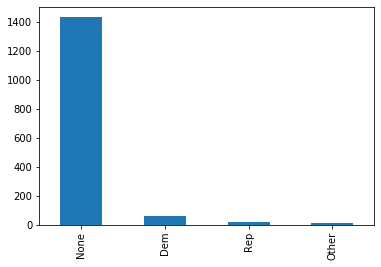

In [10]:
polldata.Affiliation.value_counts().plot(kind = 'bar')

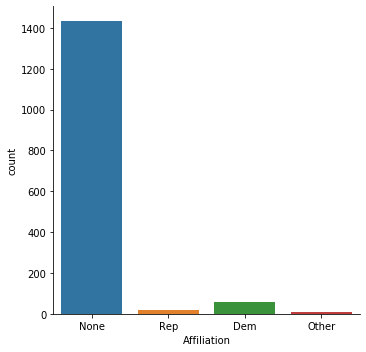

In [11]:
sns.catplot(x= 'Affiliation', data = polldata, kind = 'count' )

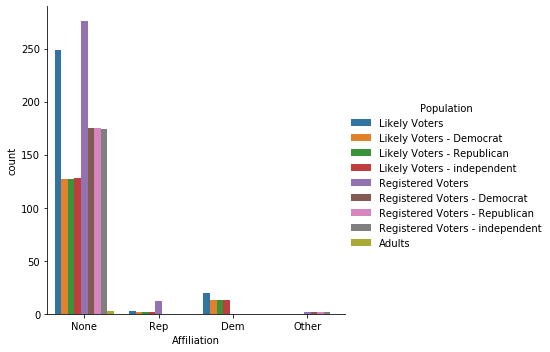

In [13]:
sns.catplot(x= 'Affiliation',hue = 'Population', data = polldata, kind = 'count' )

### 2. Did the poll results favor Mrs. Clinton or Mr. Trump?

In [ ]:
#get the average and the std of the votes

In [14]:
avg = pd.DataFrame(polldata.mean())

In [15]:
avg

,0
Number of Observations,1916.022705
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


In [18]:
avg.drop(index=['Number of Observations','Other','Question Iteration'], inplace=True)

In [19]:
stddev = pd.DataFrame(polldata.std())

In [21]:
stddev.drop(index=['Number of Observations','Other','Question Iteration'], inplace=True)

In [22]:
avgstd = pd.concat([avg,stddev],axis=1)

In [24]:
avgstd.columns = ['Average','Stdev']

In [25]:
avgstd

,Average,Stdev
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Undecided,9.315068,6.253118


In [ ]:
#Results favoured Mrs Clinton

### 3. How do undecided voters effect the poll?

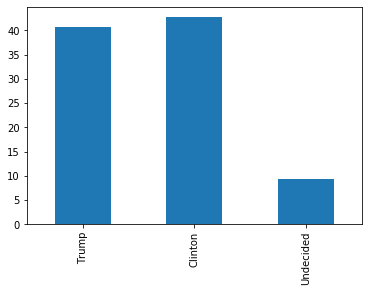

In [28]:
avgstd.plot(y = 'Average',kind='bar',legend=False)

In [ ]:
#undecide voters affected almost 10% for the decision

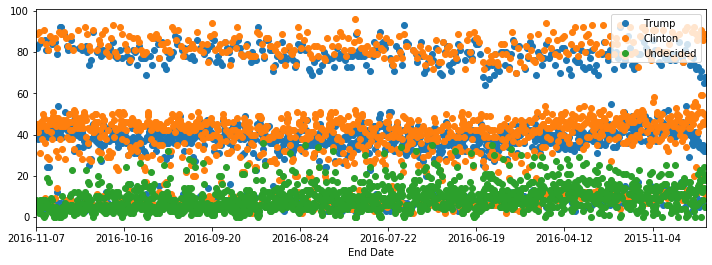

In [36]:
polldata.plot(x='End Date',y=['Trump','Clinton','Undecided'], marker = 'o', linestyle = '',figsize = (12,4))

In [40]:
polldata.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


### 4. How did voter sentiment change over time?

In [41]:
polldata['Diffence'] = (polldata.Trump - polldata.Clinton)/100

In [42]:
poll2 = polldata.groupby('Start Date',as_index=False).mean()

In [43]:
poll2.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Diffence
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


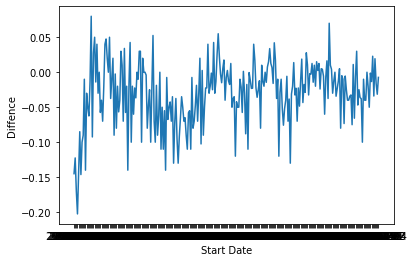

In [55]:
sns.lineplot(x= 'Start Date', y = 'Diffence', data = poll2)

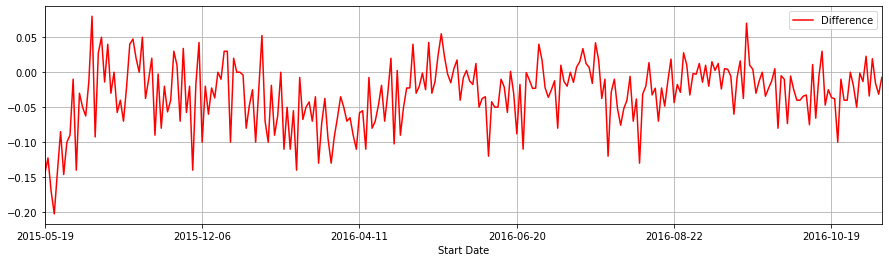

In [53]:
poll2.plot(x= 'Start Date',y='Diffence',figsize = (15,4), grid = True,color = 'red', label = 'Difference' )

In [ ]:
#we see that most of plot is in the -ve that means it favours Mrs. clinton.

### 5. Can we see an effect in the polls from the debates?

In [ ]:
#Debate dates were 26th sept, 9th oct, 19th oct

In [56]:
poll2.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Diffence
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


**Counting the dates**

In [80]:
index_count = 0
list = []
for day in poll2['Start Date']:
    if (day[0:7] == '2016-09')  or (day[0:7] == '2016-10'):
        list.append(index_count)
        index_count = index_count+1
    else:
        index_count =index_count+1
        

In [110]:
max(list)

262

In [79]:
list[0]

232

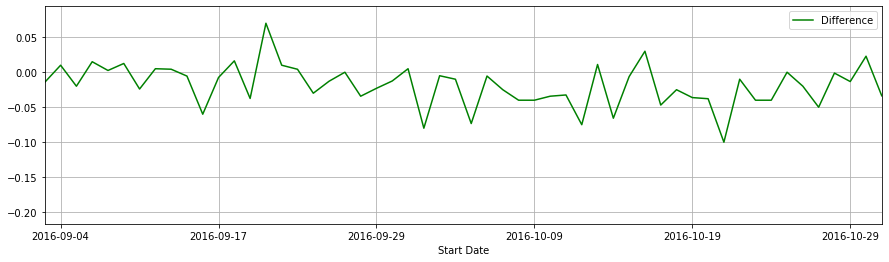

In [83]:
poll2.plot(x= 'Start Date',y='Diffence',figsize = (15,4), grid = True,color = 'green', label = 'Difference' ,xlim = (min(list),max(list)))

**Adding lines for the debate dates**

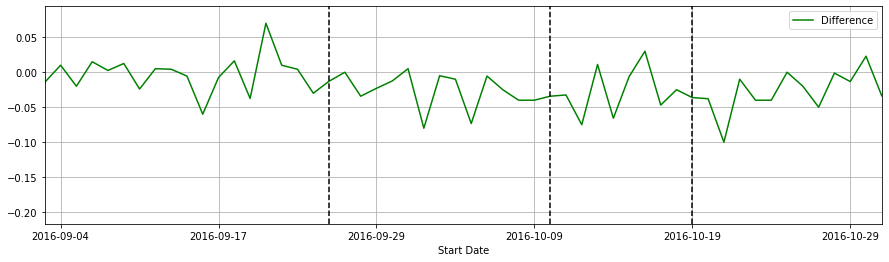

In [108]:
poll2.plot(x= 'Start Date',y='Diffence',figsize = (15,4), grid = True,color = 'green', label = 'Difference' ,xlim = (min(list),max(list)))

#26th sept 2016
plt.axvline(209+18, color='k', linestyle='--')
#9th oct 2016
plt.axvline(209+32, color='k', linestyle='--')
#19th oct 2016
plt.axvline(209+41, color='k', linestyle='--')

**Necessary Information**

In [100]:
poll2.loc[poll2.index == 209+18]

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Diffence
227,2016-09-26,4538.142857,41.357143,42.642857,3.888889,9.461538,1.357143,-0.012857


In [107]:
poll2.loc[poll2.index == 209+41]

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Diffence
250,2016-10-19,697.25,39.0,42.625,4.25,12.0,1.5,-0.03625
